In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
#lets load the required packages and libraries for data analysis
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import titanic CSV files
titanic = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

#take a look at the titanic data
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
#get a list of the features within the dataset
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
#see a sample of the dataset to get an idea of the variables
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S


In [6]:
#see a summary of the dataset
titanic.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
#check for any other unusable values
print(pd.isnull(titanic).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


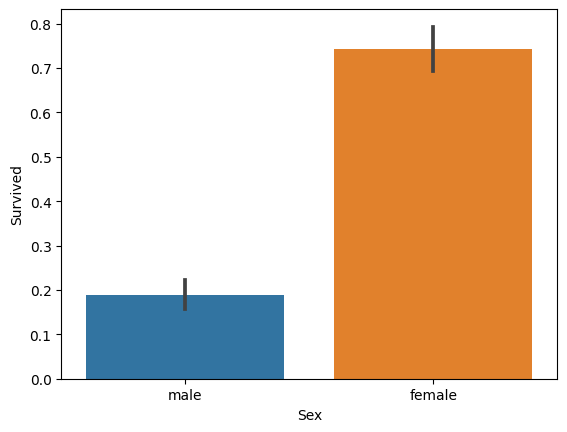

In [8]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=titanic)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


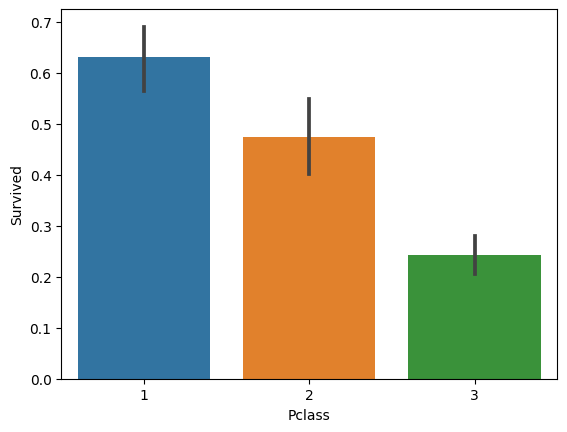

In [9]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=titanic)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", titanic["Survived"][titanic["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["Survived"][titanic["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["Survived"][titanic["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


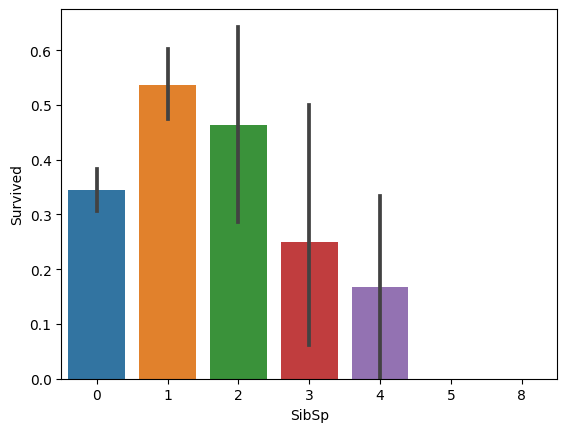

In [10]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=titanic)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", titanic["Survived"][titanic["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", titanic["Survived"][titanic["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", titanic["Survived"][titanic["SibSp"] == 2].value_counts(normalize = True)[1]*100)

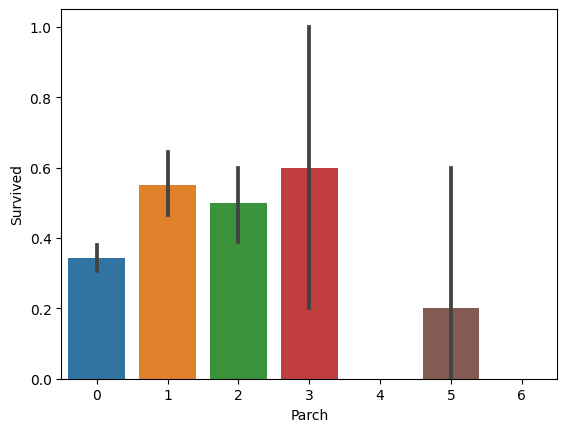

In [11]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=titanic)
plt.show()

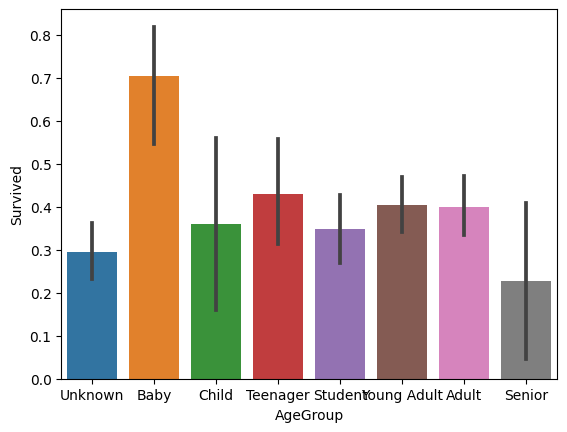

In [12]:
#sort the ages into logical categories
titanic["Age"] = titanic["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=titanic)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


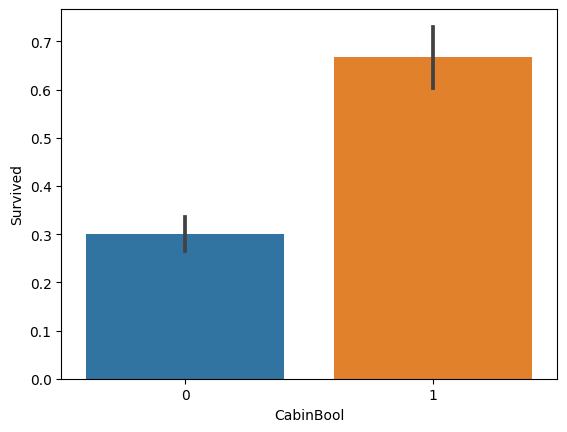

In [13]:
titanic["CabinBool"] = (titanic["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", titanic["Survived"][titanic["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", titanic["Survived"][titanic["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=titanic)
plt.show()

In [14]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,0.000000


In [15]:
titanic = titanic.drop(['Ticket', 'Cabin'], axis=1, errors='ignore')

In [16]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = titanic[titanic["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = titanic[titanic["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = titanic[titanic["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [17]:
#replacing the missing values in the Embarked feature with S
titanic = titanic.fillna({"Embarked": "S"})

In [18]:
#extract a title for each Name 
for dataset in titanic:
    titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic['Title'], titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
#replace various titles with more common names
for dataset in titanic:
    titanic['Title'] = titanic['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    titanic['Title'] = titanic['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
    titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
    titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in titanic:
    titanic['Title'] = titanic['Title'].map(title_mapping)
    titanic['Title'] = titanic['Title'].fillna(0)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,0.0


In [21]:
# fill missing age with mode age group for each title
mr_age = titanic[titanic["Title"] == 1]["Age"].mode() #Young Adult
miss_age = titanic[titanic["Title"] == 2]["Age"].mode() #Student
mrs_age = titanic[titanic["Title"] == 3]["Age"].mode() #Adult
master_age = titanic[titanic["Title"] == 4]["Age"].mode() #Baby
royal_age = titanic[titanic["Title"] == 5]["Age"].mode() #Adult
rare_age = titanic[titanic["Title"] == 6]["Age"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#titanic = titanic.fillna({"Age": titanic["Title"].map(age_title_mapping)})

for x in range(len(titanic["Age"])):
    if titanic["Age"][x] == "Unknown":
        titanic["Age"][x] = age_title_mapping[titanic["Title"][x]]

In [22]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
titanic['AgeGroup'] = titanic['Age'].map(age_mapping)

titanic.head()

#dropping the Age feature for now, might change
titanic = titanic.drop(['Age'], axis = 1)

In [23]:
#drop the name feature since it contains no more useful information.
titanic = titanic.drop(['Name'], axis = 1)

In [24]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
titanic['Sex'] = titanic['Sex'].map(sex_mapping)

titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,NaN,0,0.0
1,2,1,1,1,1,0,71.2833,C,NaN,1,0.0
2,3,1,3,1,0,0,7.9250,S,NaN,0,0.0
3,4,1,1,1,1,0,53.1000,S,NaN,1,0.0
4,5,0,3,0,0,0,8.0500,S,NaN,0,0.0


In [25]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
titanic['Embarked'] = titanic['Embarked'].map(embarked_mapping)

titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,NaN,0,0.0
1,2,1,1,1,1,0,71.2833,2,NaN,1,0.0
2,3,1,3,1,0,0,7.9250,1,NaN,0,0.0
3,4,1,1,1,1,0,53.1000,1,NaN,1,0.0
4,5,0,3,0,0,0,8.0500,1,NaN,0,0.0


In [26]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup', 'CabinBool', 'Title'],
      dtype='object')


In [27]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(titanic["Fare"])):
    if pd.isnull(titanic["Fare"][x]):
        pclass = titanic["Pclass"][x] #Pclass = 3
        titanic["Fare"][x] = round(titanic[titanic["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
titanic['FareBand'] = pd.qcut(titanic['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
titanic = titanic.drop(['Fare'], axis = 1)

In [28]:
#check titanic data
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,NaN,0,0.0,1
1,2,1,1,1,1,0,2,NaN,1,0.0,4
2,3,1,3,1,0,0,1,NaN,0,0.0,2
3,4,1,1,1,1,0,1,NaN,1,0.0,4
4,5,0,3,0,0,0,1,NaN,0,0.0,2


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

predictors = titanic.drop(['Survived','PassengerId'], axis = 1)
target = titanic["Survived"]

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Choose an appropriate strategy
predictors_imputed = imputer.fit_transform(predictors)

# Split the data
x_titanic, x_val, y_titanic, y_val = train_test_split(predictors_imputed, target, test_size=0.22, random_state=0)


In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_titanic, y_titanic)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)


NameError: name 'accuracy_score' is not defined

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_titanic, y_titanic)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree'],
    'Score': [acc_logreg,acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
# Assuming acc_logreg and acc_decisiontree are defined
acc_logreg = 81.22  # Example accuracy for Logistic Regression
acc_decisiontree = 83.76  # Example accuracy for Decision Tree

# Create a DataFrame with model names and their scores
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Score': [acc_logreg, acc_decisiontree]
})

# Sort the DataFrame by Score in descending order
models_sorted = models.sort_values(by='Score', ascending=False)

# Create a submission file (CSV)
submission_file_path = 'titanic_submission.csv'
models_sorted.to_csv(submission_file_path, index=False)

print(f'Submission file created: {submission_file_path}')